In [7]:

%load_ext autoreload
%autoreload 2
import common.utils as utils
import pandas as pd
import seaborn as sns
import os
import common.lazy as lazy
import common.charts.validation as charts
import matplotlib.pyplot as plt

sns.set_theme()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
functionName = "go-factorial-validation"
definition = utils.getBenchmarkDefinition(functionName)

Analyzing go-factorial-validation-1
Loading request metrics for go-factorial-validation-1
Loaded request metrics
Creating charts for 32


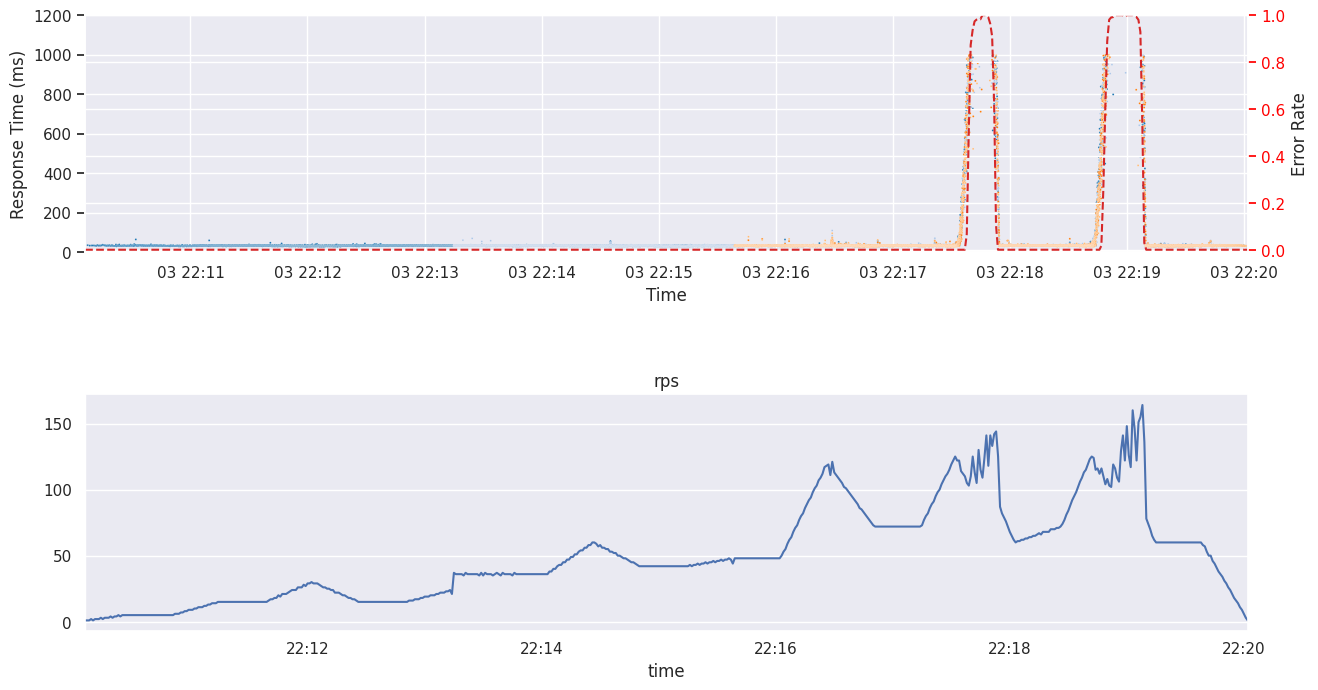

In [9]:
for run in range(1, 2):
    definition["name"] = f"{functionName}-{run}"
    print(f"Analyzing {definition['name']}")
    outputFolder = f"output/{definition['name']}"
    if not os.path.exists(outputFolder):
        os.makedirs(outputFolder)
    print(f"Loading request metrics for {definition['name']}")
    runs = [lazy.getResultSummary(definition["name"],r["name"]) for r in definition["benchmarks"]]
    data = [lazy.getHttRequestStats(definition["name"], run["replicas"]) for run in runs]
    httpStatsCombined = pd.concat(data)
    print(f"Loaded request metrics")

    for run in runs:
        print(f"Creating charts for {run['replicas']}")
        httpStats = httpStatsCombined.query(f"testName == '{run['replicas']}'")
        httpReqSending = lazy.getHttpReqSending(definition["name"], run["replicas"])
        fig, axes =charts.simpleBenchmarkChart(httpStats, httpReqSending)
        plt.savefig(f"{outputFolder}/response-time-chart_{definition['docker_image_name']}-{run['replicas']}.png", bbox_inches='tight')

